## Cuidados com a Saude - Previsão de Arritmia

In [48]:
# importando os modulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [5]:
# importando o dataframe
nomeArquivo = 'Dataset/data_saude.csv'
dataset = pd.read_csv(nomeArquivo, sep = ',')

In [7]:
dataset.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,...,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,...,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name


In [9]:
# tratando os dados nulos
dataset.fillna(dataset.mean(), inplace = True) # Substitui os dados nulos pelo valor da media para todas as colunas do dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           617 non-null    int64  
 1   ccf                           617 non-null    int64  
 2   age                           617 non-null    int64  
 3   sex                           617 non-null    int64  
 4   pain location                 617 non-null    int64  
 5   pain w exertion               617 non-null    int64  
 6   relieved after rest           617 non-null    float64
 7   pncaden                       0 non-null      float64
 8   chest pain type               617 non-null    int64  
 9   resting bp s                  617 non-null    float64
 10  hypertension                  617 non-null    float64
 11  cholesterol                   617 non-null    float64
 12  smoker                        617 non-null    float64
 13  cigar

## Preparando os dados

In [20]:
# transformando o df em array para facilitar a esoclha dos dadosa serem utilizados
dataset_array = np.array(dataset)

target = dataset_array[:,57] # esse é o valor de saida (target)
target = target.astype(int) # indica o tipo do dado
target

array([0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 2, 1, 4, 4, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 3, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 2, 0,
       2, 3, 0, 1, 0, 2, 2, 2, 3, 4, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 2,

## Iniciando a previsão

In [21]:
# dados coletados pelos sensores
dataset_sensor = np.column_stack((
    dataset_array[:,11], # pressão sanguinea em repouso
    dataset_array[:,33], # frequencia maxima atingida
    dataset_array[:,34], # frequencia cardiaca em repouso
    dataset_array[:,35], # pico de pressão sanguinea durante o exercicio
    dataset_array[:,36], # pico de pressão sanguinea durante o exercicio
    dataset_array[:,38]  # pressão sanguinea em repouso
))

In [26]:
# dados médicos do paciente
dataset_medico = np.column_stack((
    dataset_array[:,4],   # localização da dor
    dataset_array[:,6],  # alivio apos cansaço
    dataset_array[:,9],  # tipo de dor
    dataset_array[:,39], # angina induzina pelo exercicio (1 = sim e 0 = mao)
    dataset.age,
    dataset.sex,
    dataset.hypertension
))

In [30]:
# concatena os dois datasets
dataset_paciente = np.concatenate((dataset_medico, dataset_sensor), axis = 1)
dataset_paciente.shape

(617, 13)

In [31]:
# separando os dados de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(dataset_paciente, target, random_state = 223)

In [36]:
# criando objeto SVM
modelSVM = SVC(kernel = 'linear') # escolha do kernel polinomial

In [37]:
# aplicando treinamento no modelo
modelSVM.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Analisando a performance do modelo

In [46]:
# encontrar a acuracia do modelo de previsão usando o SVM
previsao = modelSVM.predict(x_test)
acuracia = accuracy_score(y_test, previsao)
print('Acuracia = ',acuracia)

Acuracia =  0.5419354838709678


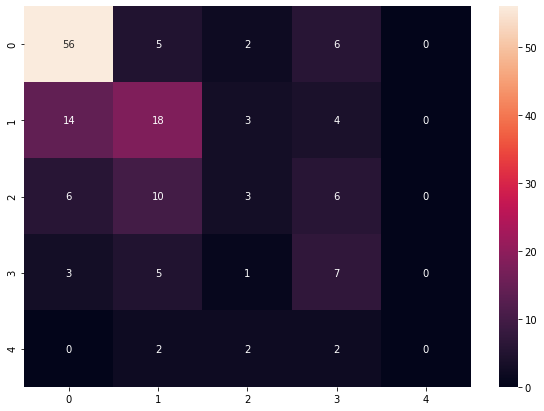

In [51]:
# criando a matriz de confusão
cm = confusion_matrix(y_test, previsao)
df_cm = pd.DataFrame(cm, index = [i for i in '01234'], columns = [i for i in '01234'])
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True)
plt.show()

## Modificando o Dataset
### Resultando não satisfatório

In [71]:
# vamos escolher apenas 13 atributos para realizar a previsão de doenças cardiaca
dataset_array = np.array(dataset)
label = dataset_array[:,57] # target 
label = label.astype('int')
label[label > 0] = 1 # quando os dados são 0 está saudavel e 1 doente
label

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [72]:
# seprando os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(dataset_paciente, label, random_state = 223)

In [73]:
# cria o objeto SVM
modelSVM = SVC(kernel = 'linear')

In [74]:
# aplica o treinamento no modelo
modelSVM.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
# aplicando o modelo treinado para os dados de teste
previsao = modelSVM.predict(x_test)

In [76]:
# encontrando a acuracia
acuracia = accuracy_score(y_test, previsao)
print('Acuracia = ',acuracia)

Acuracia =  0.7419354838709677


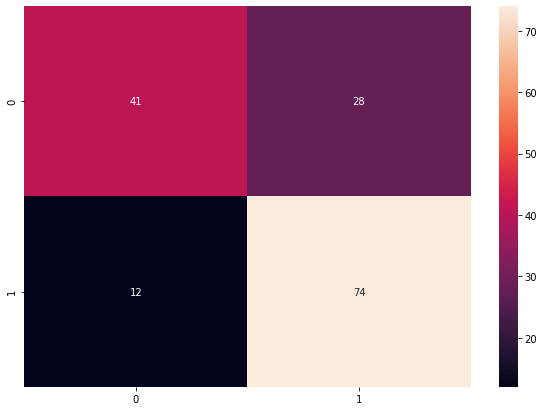

In [77]:
# criando a matriz de confusão
cm = confusion_matrix(y_test, previsao)
df_cm = pd.DataFrame(cm, index = [i for i in '01'], columns = [i for i in '01'])
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True)
plt.show()